Image Processing

سلمى شامل محمد لطفى موسى - salma.s.lotfi@gmail.com

First : import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



1- Dilation :

Before dilation :

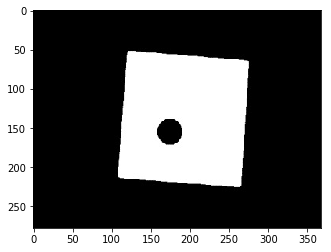

In [2]:
img = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Square-circle.jpg" , 0)
plt.imshow(img , cmap=plt.get_cmap('gray'))

After dilation with a circular structure:

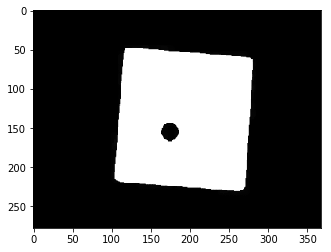

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
dilation = cv2.dilate(img , kernel , iterations = 1)

plt.imshow(dilation , cmap=plt.get_cmap('gray'))

After dilation with a square structure:

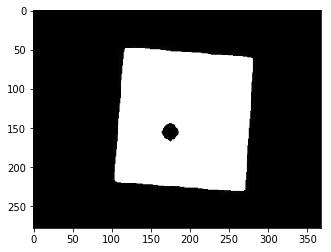

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
dilation_square = cv2.dilate(img , kernel , iterations = 1)

plt.imshow(dilation_square , cmap=plt.get_cmap('gray'))

2- Cameraman denoising:

Before Denoising:

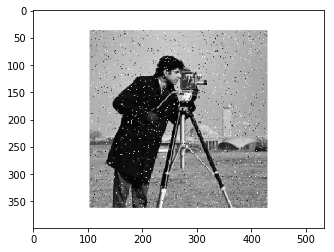

In [5]:
img2 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Cameraman.jpg" , 0)
plt.imshow(img2 , cmap=plt.get_cmap('gray'))

After Dilation with a (3,3) kernel using a circular structure:

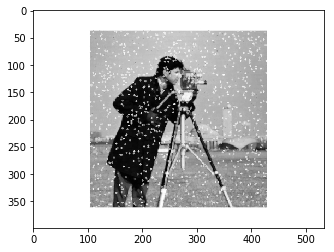

In [6]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation_cameraman = cv2.dilate(img2 , kernel2 , iterations = 1)

plt.imshow(dilation_cameraman , cmap=plt.get_cmap('gray'))

3- Edge Detection using Dilation :

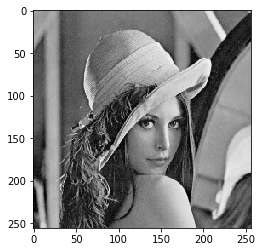

In [7]:
img3 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\lady.jpg" , 0)
plt.imshow(img3 , cmap=plt.get_cmap('gray'))

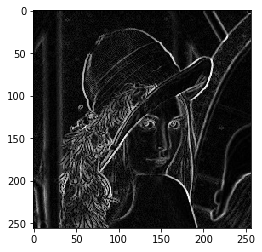

In [8]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
edge_detection = cv2.dilate(img3 , kernel3 , iterations = 1)

edge_detection = edge_detection - img3

plt.imshow(edge_detection , cmap=plt.get_cmap('gray'))

Erosion :

4- Erosion on Circle image:

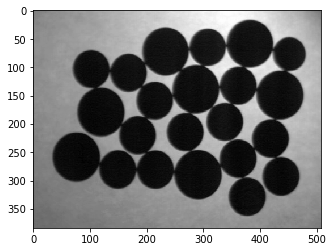

In [9]:
img4 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Circle.jpg" , 0)
plt.imshow(img4 , cmap=plt.get_cmap('gray'))

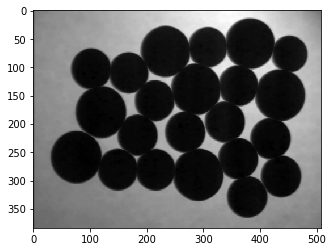

In [10]:
kernel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
erosion = cv2.erode(img4 , kernel4 , iterations = 1)

plt.imshow(erosion , cmap=plt.get_cmap('gray'))

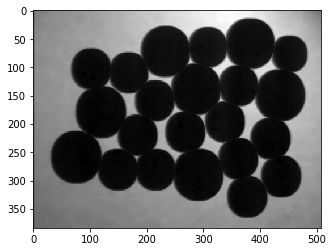

In [11]:
kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
erosion = cv2.erode(img4 , kernel4 , iterations = 1)

plt.imshow(erosion , cmap=plt.get_cmap('gray'))

5- Thesholding and erosion:

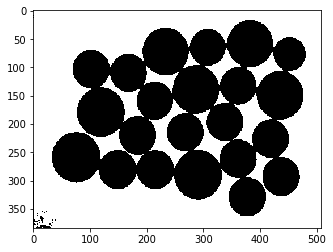

In [12]:
#thresholding part
for i in range(img4.shape[0]):
    for j in range(img4.shape[1]):
        if img4[i][j] > 128 :
            img4[i][j] = 255
        else :
            img4[i][j] = 0

plt.imshow(img4 , cmap=plt.get_cmap('gray'))

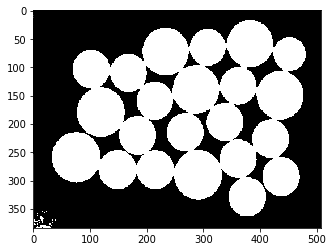

In [13]:
#invert the image to do erosion
img4 = cv2.bitwise_not(img4)

plt.imshow(img4 , cmap=plt.get_cmap('gray'))

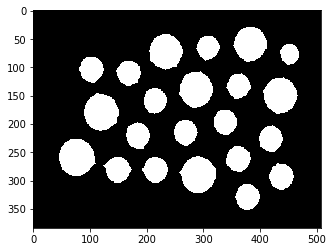

In [14]:
#erosion part for final result
kernel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))
erosion_distinct = cv2.erode(img4 , kernel4 , iterations = 2)

plt.imshow(erosion_distinct , cmap=plt.get_cmap('gray'))

6- Noise Reduction:


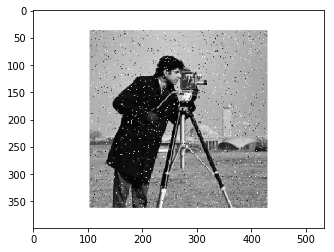

In [15]:
img5 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Cameraman.jpg" , 0)
plt.imshow(img5 , cmap=plt.get_cmap('gray'))

Denoising with Erosion:

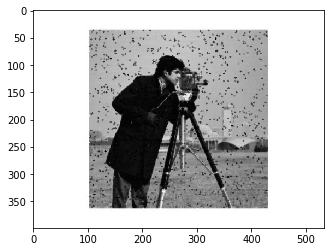

In [16]:
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erosion_denoising = cv2.erode(img5 , kernel5 , iterations = 1)

plt.imshow(erosion_denoising , cmap=plt.get_cmap('gray'))

7- Opening and Closing : 

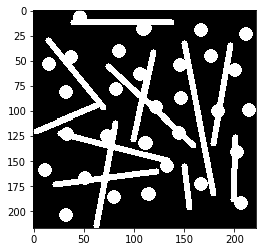

In [17]:
img6 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Circle_and_Lines.png" , 0)
plt.imshow(img6 , cmap=plt.get_cmap('gray'))

a) Circles only :

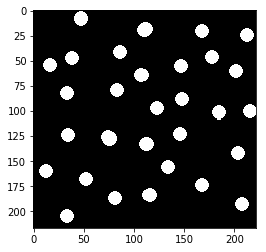

In [18]:
kernel6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

crop_img6 = img6[197:211, 26:40].copy()

#w, h = crop_img6.shape[::-1]

#res = cv2.matchTemplate(img6,crop_img6,cv2.TM_CCOEFF_NORMED)
#threshold = 1.5
#loc = np.where( res >= threshold)
#for pt in zip(*loc[::-1]):
    #cv2.rectangle(img6, pt, (pt[0] + w + 5, pt[1] + h + 5), (0,0,255), 2)
            
opening_circle = cv2.morphologyEx(img6 , cv2.MORPH_OPEN , crop_img6)
#opening_circle = cv2.morphologyEx(opening_circle , cv2.MORPH_OPEN , crop_img6)

#for i in range(100):
    #if opening_circle[10][i] == 255:
        #circle_size = circle_size + 1


plt.imshow(opening_circle, cmap=plt.get_cmap('gray'))
#plt.imshow(cv2.cvtColor(img6 , cv2.COLOR_BGR2RGB))

In [19]:
#kernel6 = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
#opening = cv2.morphologyEx(img6 , cv2.MORPH_OPEN , kernel6)

#plt.imshow(opening , cmap=plt.get_cmap('gray'))

In [20]:
#kernel6 = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
#opening = cv2.morphologyEx(img6 , cv2.MORPH_OPEN , kernel6)

#plt.imshow(opening , cmap=plt.get_cmap('gray'))

Observation : using the circle structure is the only one that gives normal circles and other structures like square and cross
              do separate the circles but don't keep the circular shape.

Lines only :

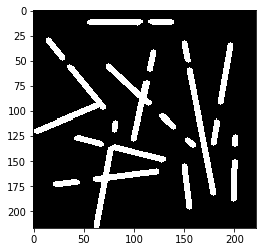

In [21]:
closing = img6 - opening_circle
kernel77 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
closing = cv2.morphologyEx(closing , cv2.MORPH_OPEN , kernel77)

kernel7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#closing = cv2.morphologyEx(closing , cv2.MORPH_OPEN , kernel7)

#kernel79 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,4))
#closing = cv2.dilate(closing , kernel79 , iterations = 1)


#kernel78 = cv2.getStructuringElement(cv2.MORPH_RECT,(1,2))
#closing = cv2.erode(closing , kernel78 , iterations = 3)


plt.imshow(closing , cmap=plt.get_cmap('gray'))

The drawbacks of this method is that the circles are a little distorted and not of the same size and the lines are cut in the
areas were the circles existed so we can't fully separate the shapes without messing up some of them.

b) Counting algorithm :

Number of circles :  31
Number of lines :  20


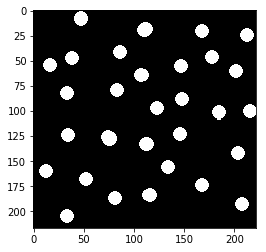

In [22]:
counter_circles = 0
counter_lines = 0
output_circle = opening_circle.copy()
output_line = opening_circle.copy()

counter_circles = cv2.connectedComponents(opening_circle , output_circle , 4)
counter_lines = cv2.connectedComponents(closing , output_line , 4)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(output_circle ,'Circle',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

print ('Number of circles : ' , counter_circles[0])
print ('Number of lines : ' , counter_lines[0])
plt.imshow(output_circle , cmap=plt.get_cmap('gray'))

Q12) Background :

(<matplotlib.axes._subplots.AxesSubplot at 0x14a438b3c88>,
 <matplotlib.image.AxesImage at 0x14a43905dd8>)

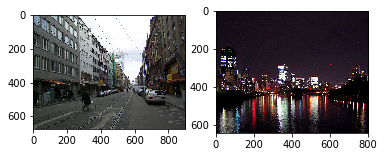

In [23]:
img7 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\morning.jpg" , 1)
img8 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\evening.jpg" , 1)
plt.subplot(122),plt.imshow(cv2.cvtColor(img8, cv2.COLOR_BGR2RGB))
plt.subplot(121),plt.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))

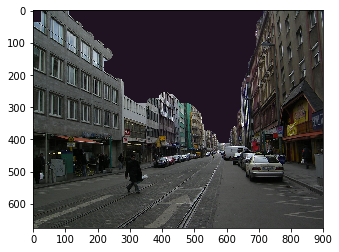

In [33]:
#morning background
gray_img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray_img7,(8,8))
kernel8 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
background_morning = cv2.dilate(blur , kernel8 , iterations = 1)

backround_morning = background_morning - gray_img7

background_morning = cv2.bitwise_not(background_morning)

kernel9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
kernel10 = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))

background_morning = cv2.morphologyEx(background_morning , cv2.MORPH_OPEN , kernel9)
background_morning = cv2.morphologyEx(background_morning , cv2.MORPH_CLOSE , kernel10)

background_morning_binary = background_morning.copy()

for i in range(background_morning.shape[0]):
    for j in range(background_morning.shape[1]):
        if background_morning[i][j] > 100:
            background_morning_binary[i][j] = 255
        else:
            background_morning_binary[i][j] = 0
            
            
#evening background
gray_img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)
blur2 = cv2.blur(gray_img8,(1,1))
kernel11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
background_evening = cv2.dilate(gray_img8 , kernel11 , iterations = 1)

backround_evening = background_evening - gray_img8

background_evening = cv2.bitwise_not(background_evening)

kernel12 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
kernel13 = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))

background_evening = cv2.morphologyEx(background_evening , cv2.MORPH_OPEN , kernel12)
background_evening = cv2.morphologyEx(background_evening , cv2.MORPH_CLOSE , kernel13)

background_evening_binary = background_evening.copy()

for i in range(background_evening.shape[0]):
    for j in range(background_evening.shape[1]):
        if background_evening[i][j] > 150:
            background_evening_binary[i][j] = 255
        else:
            background_evening_binary[i][j] = 0
            
background_evening_binary = cv2.bitwise_not(background_evening_binary)

k_old = 0
l_old = 0

for i in range(img7.shape[0]):
    for j in range(img7.shape[1]):
        if background_morning_binary[i][j] == 0:
            #for k in range(img8.shape[0]):
                #for l in range(img8.shape[1]):
                    #if background_evening_binary[k][l] == 0 :
            img7[i][j] = img8[k][l]
                        #k_old = k
                        #l_old = l
                        

plt.imshow(cv2.cvtColor(img7 , cv2.COLOR_BGR2RGB))
#plt.imshow(background_morning_binary , cmap=plt.get_cmap('gray'))

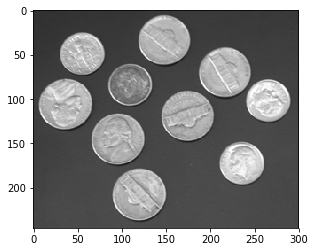

In [26]:
img9 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\coins.png" , 1)
plt.imshow(cv2.cvtColor(img9, cv2.COLOR_BGR2RGB))

sum =  400


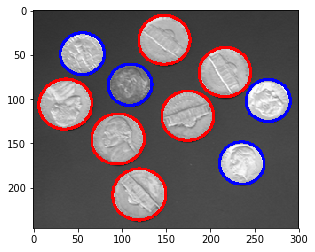

In [27]:
img9_gray = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)
img9_copy = img9.copy()

ret,thresh = cv2.threshold(img9_gray,90,255,0)
kernel10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.morphologyEx(thresh , cv2.MORPH_CLOSE , kernel10)
thresh = cv2.morphologyEx(thresh , cv2.MORPH_OPEN , kernel10)


contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

large_coin = []
small_coin = []
sum = 0

for i in range(len(contours)):
        #print(cv2.contourArea(contours[i]))
        if cv2.contourArea(contours[i]) > 2000:
            large_coin.append(contours[i])
            sum = sum + 50
        else:
            small_coin.append(contours[i])
            sum = sum + 25

img9_copy = cv2.drawContours(img9 , large_coin , -1 , (0,0,255) , 2)
img9_copy = cv2.drawContours(img9_copy , small_coin , -1 , (255,0,0) , 2)

font = cv2.FONT_HERSHEY_SIMPLEX

#cv2.putText(img9_copy , "10" , (10 , 220),font , 5 ,(0,225,0) , 2)

plt.imshow(cv2.cvtColor(img9_copy, cv2.COLOR_BGR2RGB))
print('sum = ' , sum)
#plt.imshow(thresh , cmap=plt.get_cmap('gray'))

second part : Generalization

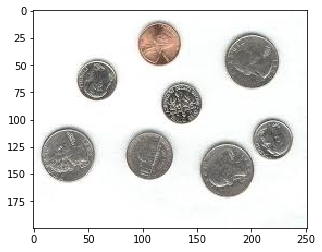

In [28]:
img10 = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\other_coins.jpg" , 1)
plt.imshow(cv2.cvtColor(img10, cv2.COLOR_BGR2RGB))

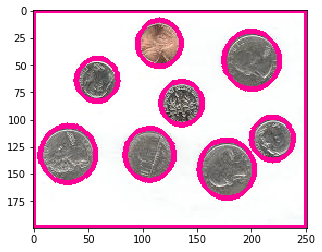

In [29]:
img10_gray = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\other_coins.jpg" , 0)
img10_copy = img10.copy()

ret,thresh = cv2.threshold(img10_gray,200,255,0)
kernel10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.morphologyEx(thresh , cv2.MORPH_OPEN , kernel10)
thresh = cv2.morphologyEx(thresh , cv2.MORPH_CLOSE , kernel10)



contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

img10_copy = cv2.drawContours(img10 , contours , -1 , (150,0,255) , 3)
#img9_copy = cv2.drawContours(img9_copy , small_coin , -1 , (255,0,0) , 2)

font = cv2.FONT_HERSHEY_SIMPLEX

#cv2.putText(img9_copy , "10" , (10 , 220),font , 5 ,(0,225,0) , 2)

plt.imshow(cv2.cvtColor(img10_copy, cv2.COLOR_BGR2RGB))
#plt.imshow(thresh , cmap=plt.get_cmap('gray'))

Bonus Part : Skeletons :

(<matplotlib.axes._subplots.AxesSubplot at 0x14a4400ca90>,
 <matplotlib.image.AxesImage at 0x14a44063828>)

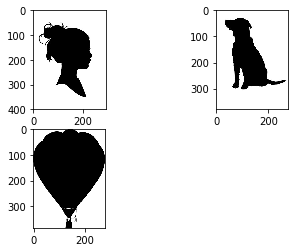

In [30]:
girl = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Girl.png" , 0)
dog = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\Dog.png" , 0)
balloon = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\HotBallon.png" , 0)

plt.subplot(221),plt.imshow(girl, cmap=plt.get_cmap('gray'))
plt.subplot(222),plt.imshow(dog,cmap=plt.get_cmap('gray'))
plt.subplot(223),plt.imshow(balloon, cmap=plt.get_cmap('gray'))

(<matplotlib.axes._subplots.AxesSubplot at 0x14a440e8358>,
 <matplotlib.image.AxesImage at 0x14a4413c0f0>)

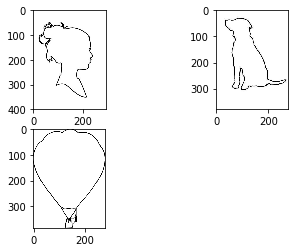

In [31]:
kernel99 = cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4))

skeleton_girl = cv2.cv2.morphologyEx(girl , cv2.MORPH_GRADIENT , kernel99)

skeleton_girl = cv2.bitwise_not(skeleton_girl)

skeleton_dog = cv2.cv2.morphologyEx(dog , cv2.MORPH_GRADIENT , kernel99)

skeleton_dog = cv2.bitwise_not(skeleton_dog)

skeleton_balloon = cv2.cv2.morphologyEx(balloon , cv2.MORPH_GRADIENT , kernel99)

skeleton_balloon = cv2.bitwise_not(skeleton_balloon)


plt.subplot(221),plt.imshow(skeleton_girl, cmap=plt.get_cmap('gray'))
plt.subplot(222),plt.imshow(skeleton_dog,cmap=plt.get_cmap('gray'))
plt.subplot(223),plt.imshow(skeleton_balloon, cmap=plt.get_cmap('gray'))
#plt.imshow(skeleton_balloon, cmap=plt.get_cmap('gray'))
    

*to obtain the skeleton of items we can use the morphological gradien method which gets the difference between the dilation and erosion of the image. 

*i used the cross structuring element to obtain an accurate skeleton line , the difference between the shapes is hard to notice but the cross seems to get he best results.

*increasing the size of the structuring element increases the thickness of the skeleton line.

computing the area of the shapes :

In [32]:
#i will use the contour function to get the area of the shapes
girl_copy = girl.copy()

ret,thresh = cv2.threshold(girl,200,255,0)
kernel10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.morphologyEx(thresh , cv2.MORPH_OPEN , kernel10)
thresh = cv2.morphologyEx(thresh , cv2.MORPH_CLOSE , kernel10)

contours1 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

area_girl = cv2.contourArea(contours1[0])

print('Girl Area =' , area_girl)

dog_copy = dog.copy()

ret,thresh = cv2.threshold(dog,200,255,0)
kernel10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.morphologyEx(thresh , cv2.MORPH_OPEN , kernel10)
thresh = cv2.morphologyEx(thresh , cv2.MORPH_CLOSE , kernel10)

contours2 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

area_dog = cv2.contourArea(contours2[0])

print('Dog Area =' , area_dog)

balloon_copy = balloon.copy()

ret,thresh = cv2.threshold(balloon,200,255,0)
kernel10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
thresh = cv2.morphologyEx(thresh , cv2.MORPH_OPEN , kernel10)
thresh = cv2.morphologyEx(thresh , cv2.MORPH_CLOSE , kernel10)

contours3 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

area_balloon = 0
for i in range(len(contours3)):
    area_balloon = area_balloon + cv2.contourArea(contours3[i])

print('Balloon Area =' , area_balloon)

#calculating the center of mass
M1 = cv2.moments(contours1[0])
M2 = cv2.moments(contours2[0])

cx_1 = int(M1['m10']/M1['m00'])
cy_1 = int(M1['m01']/M1['m00'])

girl[cx_1][cy_1] = 255
girl[cx_1+1][cy_1] = 255
girl[cx_1][cy_1+1] = 255
girl[cx_1+1][cy_1+1] = 255

cx_2 = int(M2['m10']/M2['m00'])
cy_2 = int(M2['m01']/M2['m00'])

dog[cx_2][cy_2] = 255
dog[cx_2+1][cy_2] = 255
dog[cx_2][cy_2+1] = 255
dog[cx_2+1][cy_2+1] = 255

#print(cx_2 , cy_2)

girl_copy = cv2.drawContours(girl , contours1 , -1 , (150,0,255) , 3)
dog_copy = cv2.drawContours(dog , contours2 , -1 , (150,0,255) , 3)
balloon_copy = cv2.drawContours(balloon , contours3 , -1 , (150,0,255) , 3)

#plt.imshow(girl , cmap=plt.get_cmap('gray'))

#plt.imshow(cv2.cvtColor(girl_copy, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(dog_copy, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(balloon_copy, cv2.COLOR_BGR2RGB))

Girl Area = 116907.0
Dog Area = 104225.0
Balloon Area = 42251.0
